In [27]:
import torch    
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms, datasets # transform모듈로 이미지를 불러오며 동시에 전처리 수행가능.

# GPU Settings

In [28]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda');

else:
    DEVICE = torch.device('cpu')

print('Using pytorch version:', torch.__version__, 'Device:', DEVICE)

Using pytorch version: 2.0.0+cu117 Device: cuda


# MNIST 다운로드

In [29]:
mnist_transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (1.0,)) # mean=0.5, std=1.0, 채널별로 값을 할당해준다.
    ])


download_root = './Datasets/MINIST_dataset'

train_dataset = datasets.MNIST(download_root, transform = mnist_transform, train=True, download=True)
valid_dataset = datasets.MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = datasets.MNIST(download_root, transform=mnist_transform, train=False, download=True)

In [30]:
print("train_dataset: ", train_dataset, "\n")
print("test_dataset: ", test_dataset, "\n")
print("train_dataset.data.size(): ", train_dataset.data.size())
print("train_dataset.targets.size(): ", train_dataset.targets.size())


train_dataset:  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./Datasets/MINIST_dataset
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(1.0,))
           ) 

test_dataset:  Dataset MNIST
    Number of datapoints: 10000
    Root location: ./Datasets/MINIST_dataset
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(1.0,))
           ) 

train_dataset.data.size():  torch.Size([60000, 28, 28])
train_dataset.targets.size():  torch.Size([60000])


--train_dataset의 타입확인--
<class 'torchvision.datasets.mnist.MNIST'>
<class 'torch.Tensor'>
<class 'torch.Tensor'> 

--train_dataset의 shpae확인--
torch.Size([60000, 28, 28])
torch.Size([28, 28])
torch.Size([28, 28])


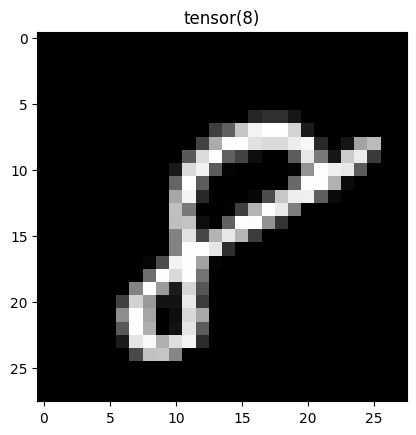

In [31]:
# train_dataset의 타입확인
print("--train_dataset의 타입확인--")
print(type(train_dataset))
print(type(train_dataset.data))
print(type(train_dataset.data[0]), '\n')

# train_dataset의 shpae확인
print("--train_dataset의 shpae확인--")
print(train_dataset.data.shape)
print(train_dataset.data[0].shape)
print(train_dataset.data[59999].shape) # 데이터가 총 60,000개 있으니 59,999 인덱스가 마지막 데이터이다.

plt.imshow(train_dataset.data[59999], cmap='gray')
plt.title(train_dataset.targets[59999])
plt.show()

# 데이터셋을 mini_batch 단위로 분리.

셔플시켜, neural net이 매번 같은 순서로 학습하지 않게 만든다.

In [32]:
batch_szie = 64
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_szie,
                          shuffle=True
                          )

valid_loader = DataLoader(dataset=test_dataset,
                          batch_size=batch_szie,
                          shuffle=True
                          )

test_loader = DataLoader(dataset=test_dataset,
                          batch_size=batch_szie,
                          shuffle=True
                          )

# 데이터확인

- x_train size: 이미지데이터 개수(batch_size)(64), 채널(그레이스케일), 가로, 세로, => [64, 1, 28, 28]
- y_train size: 64
- DataLoader 객체에서 batch_size를 64로 지정해주었으니, 이터레이션 한 번당 64개의 이미지를 텐서로 변환하여 들고온다.
- 3D Tensor: 행(bathsize), 열(length), 너비(dim)

In [33]:
# 데이터 확인 방법1
# for (x_train, y_train) in train_loader:
#     print('x_train:', x_train.size( ), 'type:', x_train.type( ))
#     print('y_train:', y_train.size( ), 'type:', y_train.type( ), '\n')

train_loader_iterator = iter(train_loader)
x_train = []
y_train = []

for x_train, y_train in train_loader_iterator:
    print('x_train:', x_train.size( ), 'type:', x_train.type( ))
    print('y_train:', y_train.size( ), 'type:', y_train.type( ), '\n')

x_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor 

x_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor 

x_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor 

x_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor 

x_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor 

x_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor 

x_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor 

x_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor 

x_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongT

# 시각화

## 시각화 방법1

torch.Size([32, 1, 28, 28])
torch.Size([32])


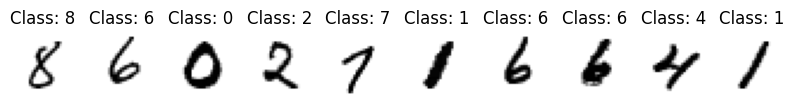

In [34]:
# Dataloader로 불러온 마지막 데이터만 x_train, y_train에 남아 이미지개수가 32개이다.
print(x_train.size()) # 32개의 이미지가 각각 1, 28, 28의 형태로 들어가있다.
print(y_train.size()) # 32개의 값이 있는 텐서

pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize)) # figure의 사이즈를 width: 10, height: 1로 설정
for i in range(10):
    plt.subplot(1, 10, i + 1) # subplot이 1행 10열로 존재하며, 인덱스 0인 subplot부터 차례대로 그림을 그린다.
    plt.axis('off')
    plt.imshow(x_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r") # i: 가리키는 이미지를 뜻함. 텐서를 넘파이로 바꾼 후 28, 28사이즈로 변경
    plt.title("Class: " + str(y_train[i].item()))


## 시각화 방법2

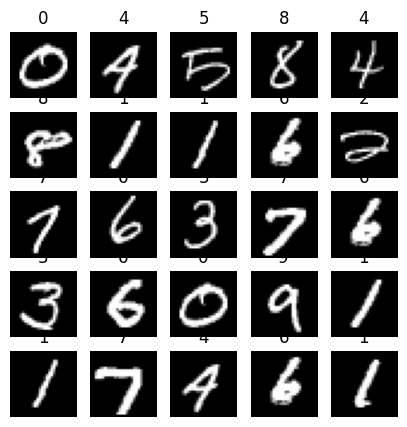

In [35]:
rows, cols = 5, 5
fig = plt.figure(figsize=(cols, rows))
for i in range(rows):
    for j in range(cols):
        # sample의 인덱스 가져오기
        sample_idx = torch.randint(len(x_train), size=(1,)).item()
        img = x_train[sample_idx]
        label = str(y_train[sample_idx].item())

        # subplot을 위한 index계산
        idx = (i * rows) + (j + 1)
        fig.add_subplot(rows, cols, idx)

        # plot 그리기
        plt.title(label)
        plt.axis('off')
        plt.imshow(img.squeeze(), cmap="gray") # squeeze()연산을 통해 1제거 (그레이스케일 채널로 남아있는 것 같다.) (1,28,28)=>(28,28)

plt.show()

# CNN Model 정의

- in_channel (int): 입력 이미지 채널의 수
- out_channel (int): 컨볼루션 연산으로 생성된 채널의 수
- kernel_size (int or tuple): convolving kernel의 크기
- stride (int or tupe, optional): 컨볼루션의 stride, Default는 1이다.
- padding (int or tuple, optional): 입력의 양쪽에 0 패딩이 추가된다. (기본값:0)
- padding_mode (string, optional): zeros, reflect, replicate, circular가 있고, 기본값은 zeros이다.
- dilation (int or tuple, optional): 커널 요소 사이의 간격. 기본값은 1이다.
  - [dilation설명](https://m.blog.naver.com/qbxlvnf11/221813169974)
  - 강제로 receptive field를 늘린다. (weight가 있는 부분은 제외한 나머지 부분은 전부 0으로 채워진다.)
- groups (int, optional): 입력 채널에서 출력 채널로 차단된 연결의 수이다. 기본값: 1
- bias (bool, optional): True이면 출력에 학습 가능한 바이어스를 추가합니다. 기본값입니다. True

In [36]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Conv2d와 maxpool사이에 activation 함수가 들어간다.
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1, # 입력 이미지의 채널 수
                out_channels=16, # 컨볼루션에 의해 생성된 채널 수 
                kernel_size=5, # 컨볼루션 커널의 크기
                stride=1,
                padding=2 # zero-padding할 사이즈
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)

        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        print("x.size(): ", x.size())
        
        x = x.view(x.size(0), -1)

        print("x.size(0): ", x.size(0))

        output = self.out(x)
        return output, x # return x for visualization

In [37]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


# Loss function 정의

In [38]:
loss_func = nn.CrossEntropyLoss()
print(loss_func)

CrossEntropyLoss()


# Optimization Function 정의


In [39]:
from torch import optim

optimizer = optim.Adam(cnn.parameters(), lr=0.01)
print(optimizer)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


# 모델 훈련
- train()이라는 함수를 생성하고 입력 매개변수로 epoch 수, 모델 및 데이터 로더를 전달한다.
- num_epochs: 모델이 전체 학습 데이터 세트를 통과할 횟수이다.

# 연습이었던 것으로 하자.
코드가 조금 이상한 점이 있어서, MNIST 데이터 핸들링하는 것으로만 보고 CNN학습은 새로 AlexNet으로 짜보자